In [31]:
!{sys.executable} -m pip freeze > requirements.txt

In [1]:
import pandas as pd
import numpy as np

In [20]:
import plotly.offline as py
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)  
from plotly.tools import FigureFactory as ff
import pycountry
import random
#import squarify
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import nbformat

In [3]:
df = pd.read_csv('datasets/Clean_Dataset.csv')
#schema = pd.read_csv('survey_results_schema.csv')

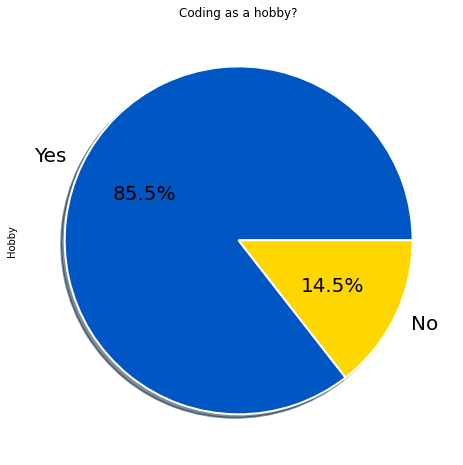

In [4]:
plt.figure(figsize=(8,8))
df["Hobby"].value_counts().plot.pie(autopct = "%1.1f%%",colors = sns.color_palette("prism",3),fontsize=20,
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("Coding as a hobby?")
plt.show()

In [5]:
df.columns

Index(['Unnamed: 0', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding',
       'YearsCodingProf', 'JobSatisfaction', 'JobSearchStatus', 'LastNewJob',
       'Currency', 'EducationTypes', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'IDE', 'OperatingSystem', 'NumberMonitors',
       'Methodology', 'VersionControl', 'CheckInCode', 'AdBlocker',
       'AdsAgreeDisagree1', 'AdsAgreeDisagree2', 'AdsAgreeDisagree3',
       'AdsActions', 'AdsPriorities1', 'AdsPriorities2', 'AdsPriorities3',
       'AdsPriorities4', 'AdsPriorities5', 'AdsPriorities6', 'AdsPriorities7',
       'AIDangerous', 'AIInteresting', 'AIResponsible', 'AIFuture',
       'EthicsChoice', 'EthicsReport', 'EthicsResponsible',
       'EthicalImplications', 'StackOverflowRecommend', 'StackOverflowVisit',
       'StackOverflowHasAccount', 'StackOverflowParticipate',
   

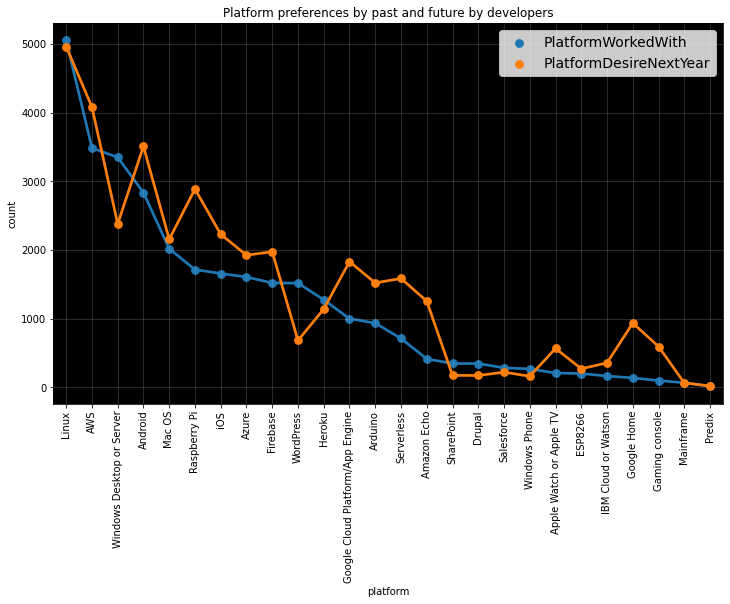

In [6]:
dat1 = df["PlatformWorkedWith"].str.split(";",expand=True).stack().reset_index()
dat1 = dat1[0].value_counts().reset_index()
dat1["type"] = "PlatformWorkedWith"

dat2 = df["PlatformDesireNextYear"].str.split(";",expand=True).stack().reset_index()
dat2 = dat2[0].value_counts().reset_index()
dat2["type"] = "PlatformDesireNextYear"

data = pd.concat([dat1,dat2],axis=0)
data["index"] = data["index"].str.replace("(Tables, CosmosDB, SQL, etc)","")

plt.figure(figsize=(12,7))
ax = sns.pointplot("index",0,data=data,hue="type")
ax.set_facecolor("k")
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
plt.xlabel("platform")
plt.ylabel("count")
plt.legend(prop={"size":14})
plt.title("Platform preferences by past and future by developers")
plt.show()

In [24]:
temp = pd.DataFrame(df['IDE'].dropna().str.split(';').tolist()).stack()
temp =  temp.value_counts().sort_values(ascending=False)
trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    marker=dict(
        color=['#FFF8DC','#68228B','#1E90FF','#FFC125','#FF6103','#8EE5EE','#458B00','#FFF8DC','#8B7355','#BF3EFF','#FF6103','#FFC125'],
        colorscale = 'Blues',
        reversescale = True
    ),
)
data = [trace]
layout = go.Layout(
    title = "Top most used IDE  by the developers (%) ",
    xaxis=dict(
        title='IDE Name',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]

In [21]:
temp = df['HoursComputer'].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time in front of desktop or computer on a typical day', hole = 0.5, color = ['#FFC124','#BFF8DF','#B7355','#BF3EFF','#FF6103','#FFC125'])

In [22]:
temp = df['HoursOutside'].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df1.iplot(kind='pie',labels='labels',values='values', title='Developers spend their time outside on a typical day', hole = 0.5,color = ['#E1C124','#A1F8DF','#AA355','#AF4EFF','#EF5103','#EFB125'])

In [23]:
# locale
traces = []
#print(stack_data['CompanySize'].unique())
def change_to_int(x):
    #print(x)
    x = x.split(" ")
    if x[0]=='Under':
        return '0 - 18 years old'
    #print(locale.atoi(x[0]))
    return str(int(x[0].replace(',', '')))+' '+' '.join(x[1:])
    
df['Age'] = df['Age'].dropna().apply(change_to_int)#map({'Fewer than 10 employees' : '0 to 10'})
#print(temp.unique())
newDiamond = df.groupby(['Age','JobSatisfaction']).size().unstack().sort_values(by ='Age')
for c in newDiamond.columns:
    traces.append({
        'type' : 'scatter',
        'x' : newDiamond.index,
        'y' : newDiamond[c],
        'name' : c
    })
fig = {
    'data' : traces,
    'layout' : {
        'title' :'Does job satisfaction depends on Age ?',
        'xaxis' :dict(
        title='Age of the Developer',
        tickfont=dict(
            size=10,
            color='rgb(107, 107, 107)'
        )
    ),        
    }
}
iplot(fig)

In [29]:
temp = df.set_index(['ConvertedSalary','Gender']).DevType.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','Gender'])
temp.columns = ['ConvertedSalary','Gender','job']
temp = temp.set_index(['ConvertedSalary','job']).Gender.str.split(';', expand=True).stack().reset_index(['ConvertedSalary','job'])
temp.columns = ['MedianSalary','job','Gender']
temp = temp.groupby(['Gender','job'])['MedianSalary'].median().sort_values(ascending = False).reset_index()
temp1 = temp[temp.Gender == 'Male']
temp2 = temp[temp.Gender == 'Female']
trace1 = go.Bar(
    x = temp1.job,
    y = temp1.MedianSalary,
    name='Male'
)
trace2 = go.Bar(
    x = temp2.job,
    y = temp2.MedianSalary,
    name='Female'
)

data = [trace1, trace2]
layout = go.Layout(
    title = "Top DevType with Median Salary(Male V.S. Female)",
    barmode='stack',
    width = 1000,
    xaxis=dict(
        title='DevType',
        tickfont=dict(
            size=8,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Median Salary ($)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)